# Morphology

[Morphology](https://en.wikipedia.org/wiki/Mathematical_morphology) is the mathematical study of shapes and has numerous applications in image processing. As such, Scikit-image has a dedicated module (`ski.morphology`) for associated functions.

We already encountered structuring elements - (of which kernels are one type) - on [earlier](4_filters) [pages](5_filters_2). A structuring element is a grid of a certain shape - you can think of it as a "template" - which is used to define the "neighbourhood" of pixels which an image processing operation affects. A (3, 3) structuring element is a square which affects 9 pixels - we might alter the image by centering this structuring element over every pixel, and replacing each pixel with the mean of the other pixels in it's "neighbourhood":

![](images/kernel_general.png)

We have seen structuring elements applied during filtering operations, courtesy of the `ski.filters` module. Morphological operations also make use of structuring elements, though in morphological operations, structuring elements are binary (contain only 0s and 1s). Morphological operations differ from the filtering operations we have seen previously because they are specifically [related to the shape (...or, well, *morphology*) of features with in the image](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm). This contrasts with operations like [mean filtering](5_filters) which "spread" pixel values around within a neighbourhood, rather than identifying and altering features with a specific shape/morphology.

# Structuring elements

Because morphological operations are part of image processing, then involve the modification of array pixel values, which is [all image processing is](3_skimage_processing_from_numpy_and_scipy.). In morphological operations, the structural element will alter pixel values *depending upon the match between the shape of the structural element and the shape of the pixels in the "neighbourhood" of the structural element*. E.g. with the "neighbourhood" being the pixels currently under the structural element. The structural element, typically, is centred once on every pixel in an image, and this central pixel is modified (or not) depending upon the match betweent the shape of the structural element and the shape depicted by the pixels in that neighbourhood.

Let's make ourselves a simple binary image, so we can clearly see the effect of the foundational morphological operations:

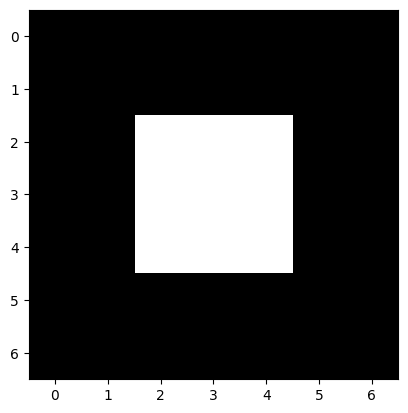

In [1]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# A custom function for displaying image attributes.
from show_attributes import show_attributes

# A custom function for comparison plots.
def show_both(original,
              altered, 
              alteration='',
              figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title(alteration)
    plt.imshow(altered)
    plt.show()

# Set 'gray' as the default colormap
plt.rcParams['image.cmap'] = 'gray'

# Make a binary square.
square = np.array([[0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 0, 1, 1, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(square);

We already used `ski.morphology.disk()` on on the [filters](5_filters) page, to modfiy the kernel shape of a mean filter. 

Let's get fancy and ostentacious now, and invest in some diamonds, by which we mean let's use `ski.morphology.diamond()` to construct a structuring element:

[[0 1 0]
 [1 1 1]
 [0 1 0]]


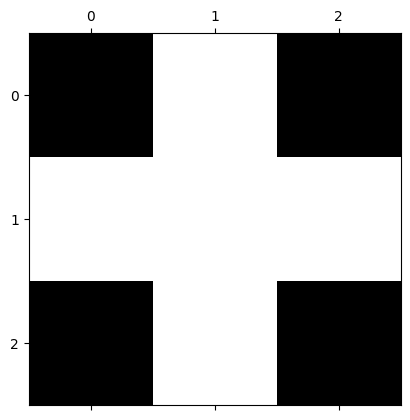

In [2]:
# Create a `diamond` structuring element.
diamond = ski.morphology.diamond(radius=1) # Changing `radius` will change the size of the diamond.

# Show the diamond.
print(diamond)
plt.matshow(diamond);

Using `ski.morphology.diamond(radius=1)` gives us a diamond shaped structuring element of `shape` (3, 3) (we'd say "cross" but "diamond" is the canonical term as it will look more diamond-like (diamond-y?) when set to a bigger shape...) :

In [3]:
diamond.shape

(3, 3)

# Erosion

The fundamental operations of morphological image processing are *erosion* and *dilation*. These affect bright and dark regions in an image. We will consider erosion first.

Much like when bad behaviour spreads through a social group, erosion will lower a given pixels value down to lowest value within its neighbourhood - which is to say the lowest pixel value under the structuring element. The structuring element is centred on a pixel, and it is this central pixel that is altered and set to the lowest value in the neighbourhood. However, it will only perform this lowering *if the pixels in the neighbourhood do not match the shape of the structuring element*, else it will leave the central pixel unchanged.

As mentioned above, a full morphological operation involves centering the structuring element on *every pixel in the image*, so every pixel gets altered by the other pixels in its neighbourhood. Like most (efficient) processes in computing, the operation is done in parallel (at the same time to all pixels in the images, rather than sequentially). 

We can erode our binary square using `ski.morphology.erosion()`, we use the `footprint` argument to specify our structuring element:

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


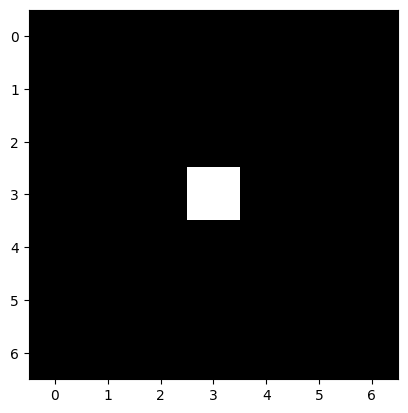

In [4]:
# Erode our image.
eroded_square = ski.morphology.erosion(square,
                                       footprint=diamond)

# Show the result.
print(eroded_square)
plt.imshow(eroded_square);

What has happened here? We can think of our `diamond` structing element as being a bit like a weird [crosshair/reticle](https://en.wikipedia.org/wiki/Reticle) of a gun. In a morphological operation, we "target" the crosshair on a given array pixel. Because we are eroding, the central pixel will be *lowered to the value of the lowest pixel in its neighbourhood* if the pixels in the neighbourhood do not "match" the shape of the structuring element. This is illustrated below. 

Now, because our `sqaure` array contains only 1s and 0s, central pixels "match" the structuring element if the pixels under the structuring element are 1 where the value sin the structuring element are 1. The image below shows the `diamond` structuring element being applied to three different central pixels. "Matches" between the structuring element and the array pixels are depicted with a green tick; "clashes" between the structuring element and the array pixels are depicted with a red X. "Clashes" occur where the structuring element value is 1 and the array pixel value is 0. 

If a "clash" occurs, then the central pixel gets lowered to the lowest value under the structuring element (0). (We call this, loosely, the central pixel "dying").

If a full "match" occurs between the neighbourhood values and the structuring element, then the central pixel is left altered (we say that it "survives"):

![](images/hit_n_miss_with_text.png)

Let's repeat this erosion process with two `square` arrays `concatenate`d together.

What do you think will happen when we erode them using the `diamond` structuring element? Try to predict before you check:

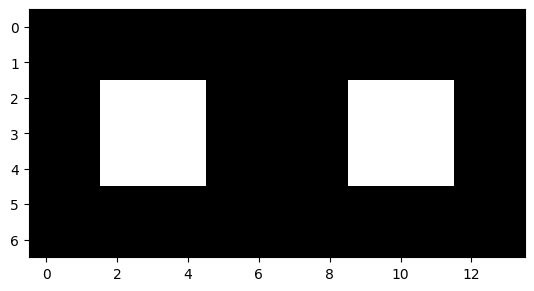

In [5]:
# `concatenate` two `square` arrays.
two_squares = np.concatenate([square, square], axis=1)
plt.imshow(two_squares);

In [6]:
# Perform the erosion.
eroded_two_squares = ski.morphology.erosion(two_squares, diamond)

eroded_two_squares

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

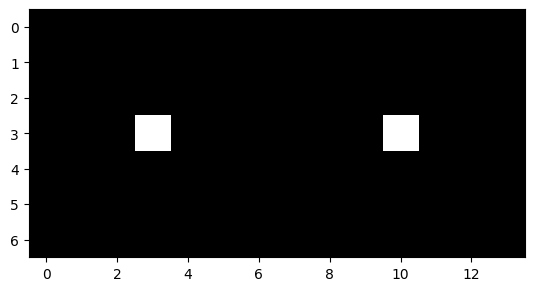

In [7]:
# Plot the result of the erosion.
plt.imshow(eroded_two_squares);

What happened here? Well, again a "match" only occurs for two pixels in the image, the pixels at the centre of each white square. This illustration below shows what happened:

![](images/hit_n_miss_with_text_2.png)

All other "neighbourhoods" did not match the structuring element, and so the values in the neighbourhood were lowered to 0, 0 being the lowest value in each neighbourhood.

Let's alter our image array slightly, to see how this affects the erosion operation with our `diamond` structuring element. We will place a black array pixel inside the right hand white square:

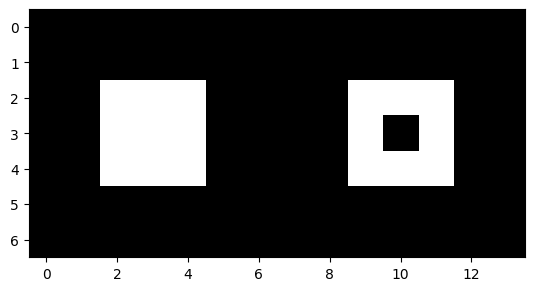

In [8]:
# A modified array.
square_the_circle = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
                               [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                               [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 
                               dtype="uint8")

plt.imshow(square_the_circle);

Before looking at the output of the cell below, try to think carefully about how you think this will affect the erosion operation, using the (3, 3) `diamond` structuring element. Picture what will happen on the black pixel in the centre of the right-hand square.

Scroll down to the output of the cell below to see if your prediction was correct:

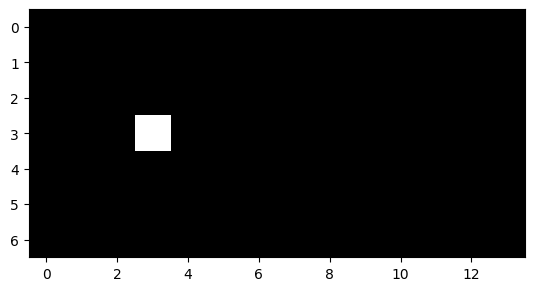

In [9]:
eroded_square_the_circle = ski.morphology.erosion(square_the_circle, diamond)

plt.imshow(eroded_square_the_circle);

Ok, so now the whole right-hand square got taken out. Brutal.

Why did this happen? The cell below illustrates, again using green ticks for "matches" between the structuring element and the pixel "neighbourhood", and red X's for "clashes" between the structuring element and the pixel "neighbourhood".

Remember that a "clash" means the central pixel "dies"; a "match" means the central pixel "survives":

![](images/hit_n_miss_with_text_3.png)

# Dilation

The other foundational operation in morphological image processing is *dilation*. Dilation works the same as erosion in terms of centering a structuring element on each pixel and looking for "matches" or "clashes". However, it does exactly the opposite thing for pixels where it finds a "clash". Where, in the event of a "clash", erosion *lowers* central pixel values down to the neighbourhood minimum, dilation instead *raises* central pixel to the value of the neighbourhood maximum.

Let's dilate the `square` array:

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


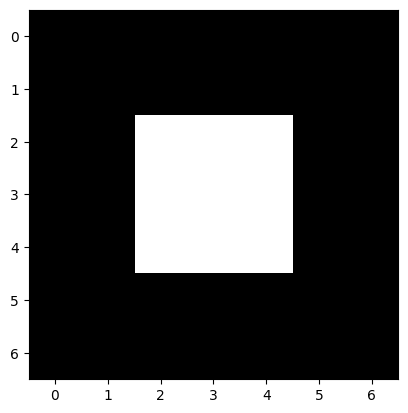

In [10]:
# Show the `square` array.
print(square)
plt.imshow(square);

Now, we use `ski.morphology.dilation()` to dilate the image, again using `diamond` as our structuring element:

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]


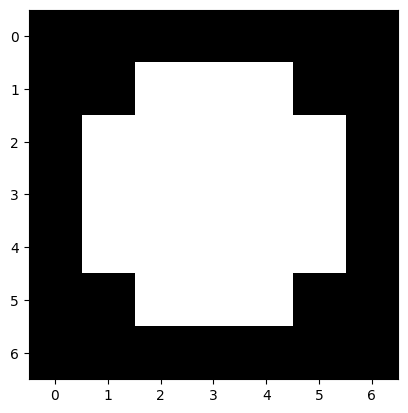

In [11]:
# Perform the dilaton.
dilated_square = ski.morphology.dilation(square,
                                         footprint=diamond)

# Show the result.
print(dilated_square)
plt.imshow(dilated_square);

Ok, so no some of the "clashes" have resulted in *more* white pixels in the image. The illustration below shows this for three pixels, two "clashes" and the one "match":

![](images/hit_n_miss_dilation.png)

What do you think will happen if we dilate the `square_the_circle` array image shown below, using the `diamond` structuring element?

Try to predict before checking.

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0 0 0 1 0 1 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


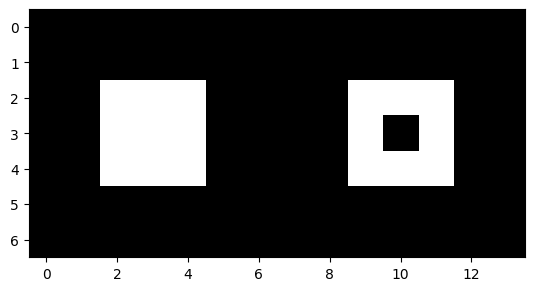

In [12]:
# Show the array.
print(square_the_circle)
plt.imshow(square_the_circle);

Let's see how good your prediction was:

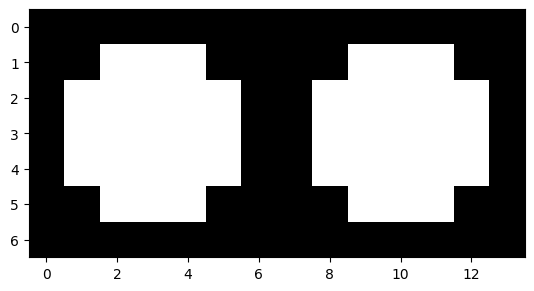

In [13]:
# Dilate the `square_the_circle` array, and show the result.
dilated_square_the_circle = ski.morphology.dilation(square_the_circle, 
                                                   footprint=diamond)
plt.imshow(dilated_square_the_circle);

Why did this happen? The image below explains:


![](images/hit_n_miss_with_text_3_dilation.png)

For erosion, all of the "clashing" pixels in the right-hand square get *lowered* to their neighbourhood minimum, in this case 0, and so they "die" and fade into the black background.

For dilation, clashing central pixels get *raised* to the neighbourhood maximum, which in this case is 1. 

So, [remember](https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_morphology.html):

*Erosion enlarges dark regions and shrinks bright regions.*

*Dilation enlarges bright regions and shrinks dark regions.*

# Morphology using more complex images

Let's apply some of this to more complex images. Fittingly, we will use a terrifying picture of a [Xenomorph](https://en.wikipedia.org/wiki/Xenomorph), which at the time of writing Wikipedia defines as "a fictional endoparasitoid extraterrestrial species that serves as the main antagonist of the Alien and Alien vs. Predator franchises".

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


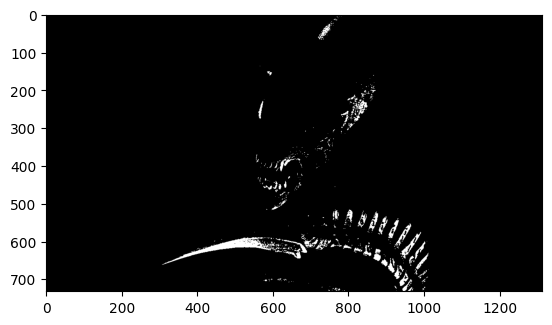

In [14]:
# Image from: https://static1.srcdn.com/wordpress/wp-content/uploads/2019/07/Xenomorph-from-the-Alien-franchise.jpg
xenomorph = ski.io.imread("images/xenomorph.png", 
                          as_gray=True)
# Convert to binary.
xenomorph = ski.util.img_as_bool(xenomorph).astype(int)

# Show the "raw" array, then show graphically.
print(xenomorph)
plt.imshow(xenomorph);

In [15]:
# Show the attributes of `xenomorph`.
show_attributes(xenomorph)

Type: <class 'numpy.ndarray'>
dtype: int64
Shape: (732, 1313)
Max Pixel Value: 1
Min Pixel Value: 0


Scary, especially as a binary image, but not quite as scary as the `smiley` image we [made](0_images_as_numpy_arrays.Rmd) that still haunts our dreams. 

True to form, eroding this image using the `diamond` structuring element increases the size of dark regions:

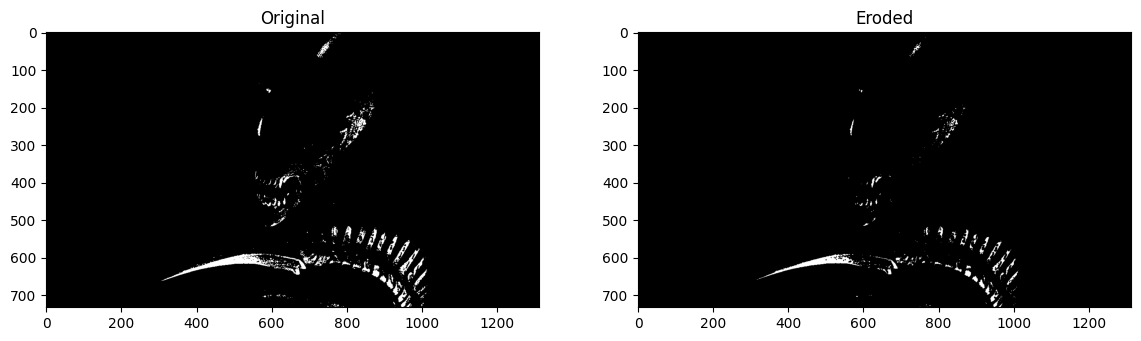

In [16]:
# Erode the xenomorph.
xeno_binary_ero_rad_1_diamond = ski.morphology.erosion(xenomorph, 
                                                       footprint=diamond)

# Show the result.
show_both(xenomorph, xeno_binary_ero_rad_1_diamond, "Eroded");

Whilst dilation increases the size of bright regions (creating a truly, truly terrifying image):

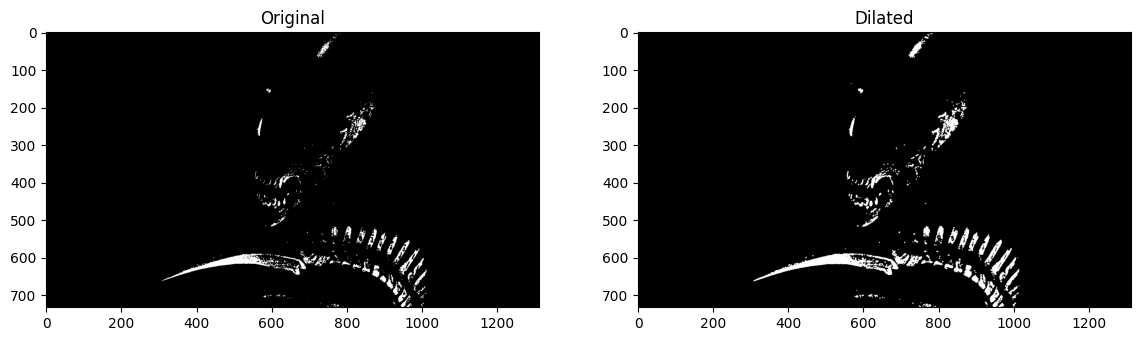

In [17]:
# Dilate the xenomorph.
xeno_binary_dilate_rad_1_diamond = ski.morphology.dilation(xenomorph, 
                                                           footprint=diamond)

# Show the result.
show_both(xenomorph, xeno_binary_dilate_rad_1_diamond, "Dilated");

We can alter the size of the structuring element to change the nature of the effect. The exact change will be heavily dependent on the image array we are processing. Here we create a diamond with `radius = 6`:

[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]


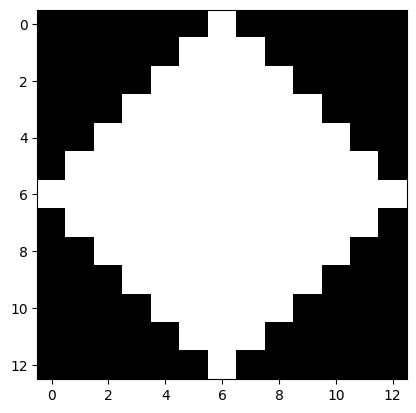

In [18]:
# Create and show a larger diamond structuring element.
diamond_6 = ski.morphology.diamond(radius=6)
print(diamond_6)
plt.imshow(diamond_6);

Applied to the xenomorph image, this has some radical results:

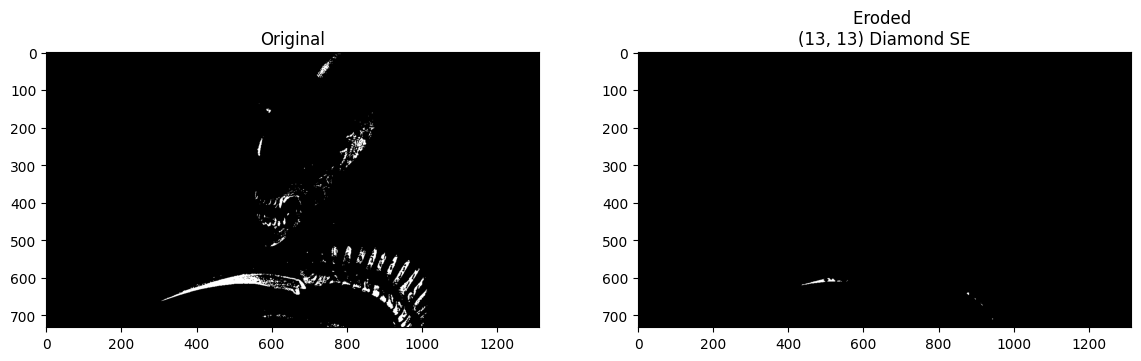

In [19]:
xeno_binary_ero_rad_6_diamond = ski.morphology.erosion(xenomorph, 
                                                       footprint=diamond_6)
show_both(xenomorph, xeno_binary_ero_rad_6_diamond, "Eroded \n(13, 13) Diamond SE");

There are less "matches" between the large structuring element and pixel neighbourhoods in the image. Thus, the darker regions have expanded substantially more than when we used a smaller `diamond`, which gave more "matches".

Dilation, again has the opposite effect of increasing brighter regions, in the event of "clashes":

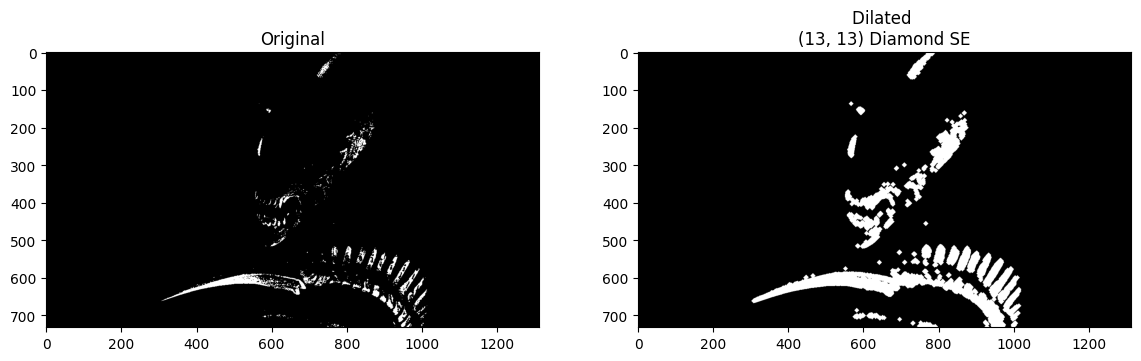

In [20]:
# Dilate the xenomorph with the `radius = 6` diamond.
xeno_binary_dilate_rad_6_diamond = ski.morphology.dilation(xenomorph, 
                                                           footprint=diamond_6)
show_both(xenomorph, xeno_binary_dilate_rad_6_diamond, "Dilated \n(13, 13) Diamond SE");

We can also change the shape of the struturing element - here we create a rectangle of `shape` (3, 3):

In [21]:
# A square structuring element.
square_SE = ski.morphology.footprint_rectangle((3, 3))
square_SE

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

This new structuring element is the same `shape` as the kernels we used on the [filtering page](5_filters). Below we use it to erode the xenomorph image:

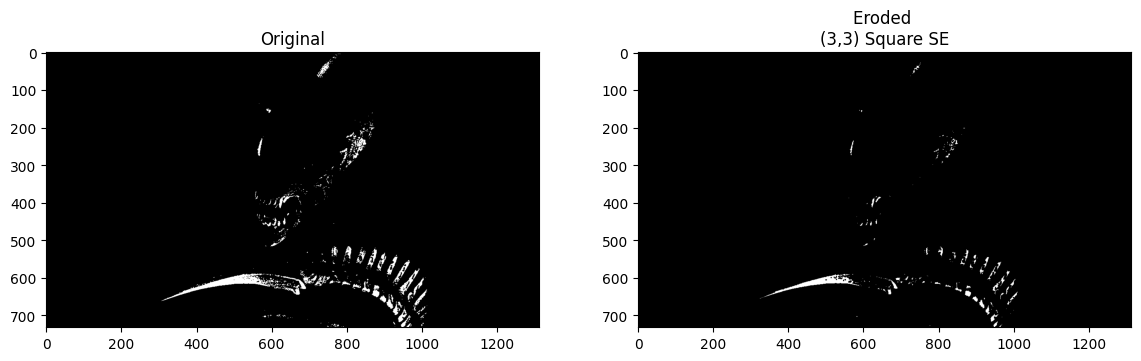

In [22]:
# Erode the xenomorph (with the square structuring element).
xeno_binary_ero_square = ski.morphology.erosion(xenomorph, 
                                                footprint=square_SE)
show_both(xenomorph, xeno_binary_ero_square, "Eroded \n(3,3) Square SE");

Dilation with this new structuring element once more enlarges brighter regions, with horrific results:

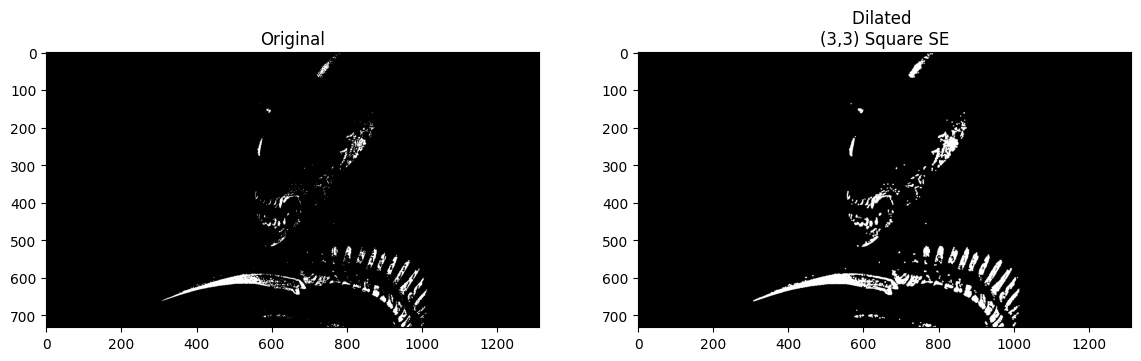

In [23]:
# Dilate the xenomorph, with the new structuring element.
xeno_binary_dilate_square = ski.morphology.dilation(xenomorph, 
                                                    footprint=square_SE)
show_both(xenomorph, xeno_binary_dilate_square, "Dilated \n(3,3) Square SE");

Changing the shape or size of the structuring element (likely) changes the number of "matches", and therefore the degree and location of changes to the bright/dark regions, for both erosion and dilation. We are essentially looking for features of a certain shape (the shape of our structuring element) in the image, and then dilating/eroding on the basis of the number of matches/clashes.

::: {exercise-start}
:label: block-xeno
:class: dropdown
:::

Try to recreate the following image by processing `xenomorph`, using only `skimage` morphological operations, as well as operations from the other tutorials, from `numpy`, `scipy` and `skimage`:

![](images/xeno_ex_1.png)

Look at the shape, the *morphology* of the features in the image - what shape and size structuring element do you think you need? Do you think you need dilation or erosion?

For comparison, here is the original image:

![](images/xenomorph_binary.png)

In [24]:
# YOUR CODE HERE
img = ...

::: {exercise-end}
:::

::: {solution-start} block-xeno
:class: dropdown
:::

We promised earlier that the `diamond` structuring element would get more diamond-like when it is larger. To complete this exercise, you need `big_diamond` with `radius = 30`:

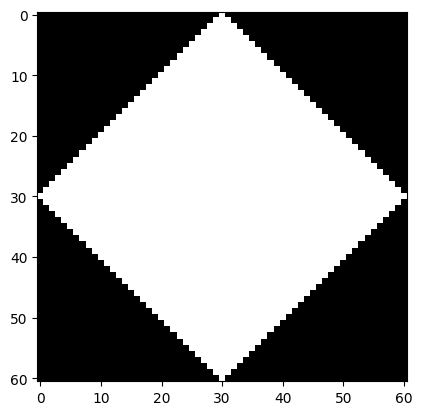

In [25]:
# Expensive!
big_diamond = ski.morphology.diamond(radius=30)
plt.imshow(big_diamond);

Dilating with this `big_diamond` will give you the right outline, but the wrong colours:

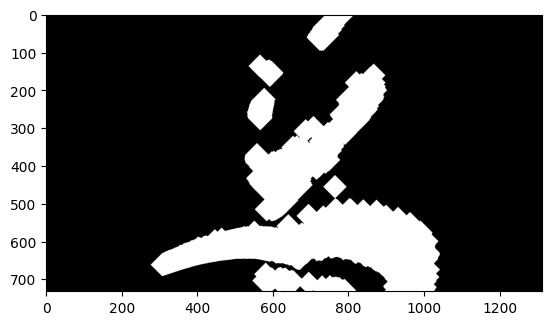

In [26]:
# Solution, part 1:
xeno_big_diamond = ski.morphology.dilation(xenomorph, 
                                           footprint=big_diamond)
plt.imshow(xeno_big_diamond);

To get the target image, we need to `invert` the colours:

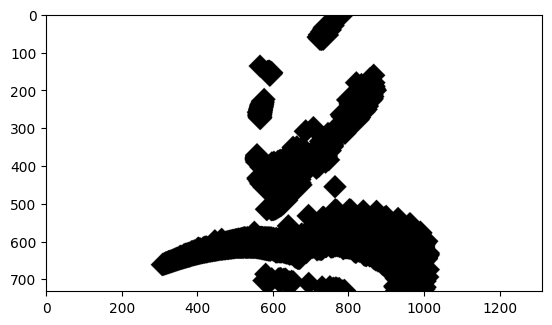

In [27]:
# Solution, part 2:
inverted_xeno_big_diamond = ski.util.invert(xeno_big_diamond)
plt.imshow(inverted_xeno_big_diamond);

::: {solution-end}
:::

# Skeletonize

In keeping with the horror theme of the `xenomorph` image, and the legacy of the [`smiley`](3_skimage_processing_from_numpy_and_scipy.) array, let's look at the `ski.morpholoy.skeletonize()` function. 

This takes a binary image and finds its "skeleton" - e.g. the centreline of shapes in the image, and marks it out with a [single pixel-wide set of lines](https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_morphology.html#skeletonize):

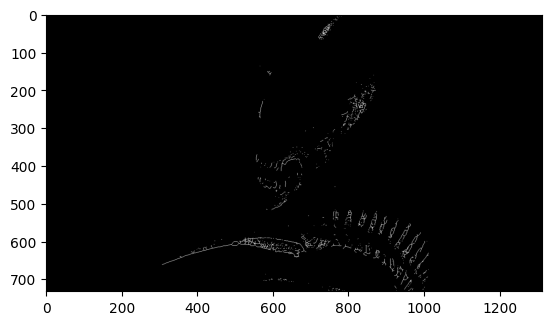

In [28]:
# Skeletonize the xenomorph (skeletonomorph?)
skeletonized_xenomorph = ski.morphology.skeletonize(xenomorph)
plt.imshow(skeletonized_xenomorph);

We can also do this with less nightmarish results, to other images, such as the much more friendly `horse` from `ski.data`:

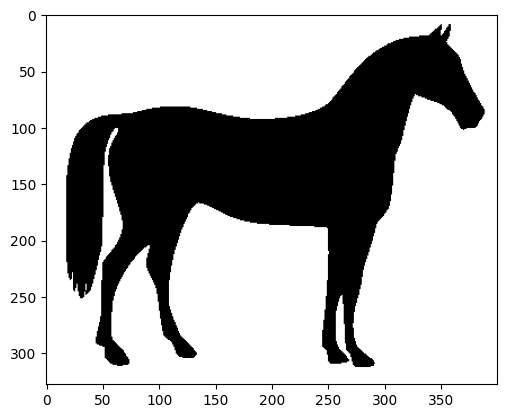

In [29]:
# Import the `horse` image from `ski.data`
horse = ski.data.horse()
plt.imshow(horse);

In [30]:
show_attributes(horse)

Type: <class 'numpy.ndarray'>
dtype: bool
Shape: (328, 400)
Max Pixel Value: True
Min Pixel Value: False


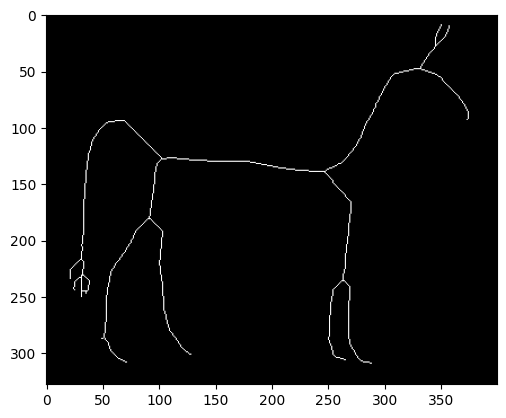

In [31]:
# Skeletonize `horse`.
skeleton_horse = ski.morphology.skeletonize(horse == 0) # The image must be binary numeric, not Boolean, to `skeletonize`.

plt.imshow(skeleton_horse);

Ok, maybe that is still quite nightmarish...

# Summary

On this page we have looked at fundamental morphological operations in `skimage`.

# References

Based on: https://scikit-image.org/skimage-tutorials/lectures/3_morphological_operations.html

Also based on: (https://biapol.github.io/Image-data-science-with-Python-and-Napari-EPFL2022/day2d_image_segmentation/03_Morphological_operations.html)